<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.2 线性回归的从零开始实现

In [0]:
# !pip install mxnet d2lzh

In [0]:
%matplotlib inline  
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [410]:
features[0], labels[0]

(
 [-0.28934464 -0.16743031]
 <NDArray 2 @cpu(0)>, 
 [4.184588]
 <NDArray 1 @cpu(0)>)

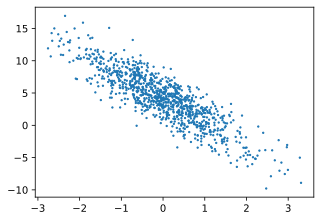

In [411]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(5, 3.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 2);

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [413]:
batch_size = 10 

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break 


[[ 2.07824779e+00 -3.68732482e-01]
 [-1.13827616e-01 -2.01625443e+00]
 [ 2.39136815e-03  1.41649675e+00]
 [ 6.21092916e-01 -1.17345893e+00]
 [-6.59531504e-02 -2.65639520e+00]
 [-5.80501080e-01  4.16852087e-01]
 [ 1.41601706e+00  1.09859653e-01]
 [-2.67569125e-01 -4.96405721e-01]
 [ 1.24707985e+00  2.96709943e+00]
 [-7.31720865e-01 -1.22169828e+00]]
<NDArray 10x2 @cpu(0)> 
[ 9.6050205 10.7991495 -0.6140856  9.433     13.094033   1.6211259
  6.666772   5.357855  -3.396866   6.896246 ]
<NDArray 10 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [419]:
lr = 0.03
num_epochs = 3 
net = linreg 
loss = squared_loss 

loss_ls, train_ls = [], []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
        loss_ls.append(l.mean().asscalar())
    train_l = loss(net(features, w, b), labels)
    train_ls.append(train_l.mean().asscalar())
    # if (epoch+1) % 10 == 0:
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.033676
epoch 2, loss 0.000111
epoch 3, loss 0.000047


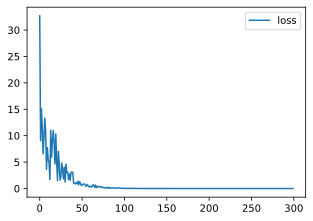

In [420]:
import matplotlib.pyplot as plt

plt.plot(loss_ls, label='loss')
# plt.plot(train_ls, label='train loss')
plt.legend()
plt.show()

## 3.3 线性回归的简洁实现

In [0]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
from mxnet.gluon import data as gdata 

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [424]:
for X, y in data_iter:
    print(X, y)
    break 


[[-0.6824976  -1.0925928 ]
 [-0.13887577 -1.7101122 ]
 [ 0.8357337  -0.26587394]
 [-0.13513115  0.9436868 ]
 [-1.302891   -1.2163043 ]
 [ 1.6978937  -2.2290225 ]
 [-0.8981981   0.90205747]
 [-0.2669177   1.5207474 ]
 [-1.363255    1.6338954 ]
 [-1.088221    0.24256945]]
<NDArray 10x2 @cpu(0)> 
[ 6.538853   9.722366   6.7779613  0.7141273  5.729477  15.1638565
 -0.6499223 -1.501686  -4.0691414  1.2159497]
<NDArray 10 @cpu(0)>


In [0]:
# gdata.ArrayDataset??

In [0]:
from mxnet.gluon import nn

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01), force_reinit=True)

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [450]:
num_epochs = 3 

loss_ls = []
for epoch in range(1, num_epochs+1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
        loss_ls.append(l.mean().asscalar())
    l = loss(net(features), labels)
    print(dense.weight.grad())
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))


[[-0.78418404  1.3589039 ]]
<NDArray 1x2 @cpu(0)>
epoch 1, loss: 0.036242

[[0.0152745  0.12053883]]
<NDArray 1x2 @cpu(0)>
epoch 2, loss: 0.000126

[[0.07360719 0.03731361]]
<NDArray 1x2 @cpu(0)>
epoch 3, loss: 0.000046


In [444]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 1.9994129 -3.3997862]]
 <NDArray 1x2 @cpu(0)>)

In [445]:
true_b, dense.bias.data()

(4.2, 
 [4.199093]
 <NDArray 1 @cpu(0)>)

In [446]:
dense.weight.grad()


[[0.03048145 0.02114061]]
<NDArray 1x2 @cpu(0)>

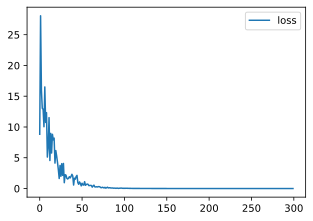

In [443]:
import matplotlib.pyplot as plt 

plt.plot(loss_ls, label='loss')
plt.legend()
plt.show()

In [0]:
# gluon.Trainer??